<center><img src='https://netacad.centralesupelec.fr/img/cs.jpg' width=200></center>

<h6><center>Introduction to Machine Learning</center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>TD 4: Unsupervised Learning: Clustering</center>
<hr style=" border:none; height:3px;">
</h1>

__Teachers__: Myriam Tami, Gianluca Quercini, Yassine Ouali

# Introduction

This lab consists of two parts. In the first part, we're going to experiment K-means clustering approach on both simulated and real data; in the second part, we're going to perform Hierarchical clustering. 
A part of this lab is a Python adaptation of p. 404-413 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

The objectives of this practical session is to: 
 + present the use of scikit-learn functionalities concerning classification with both k-means and hierarchical clustering;
 + contribute to a better understanding of these methods and of the impact on the results of the data distribution or initialization technique (random initialization or k-means ++). 
 
This is done by examining controlled generated data first and then real data.



# Setup

We import the modules that are commonly used in combination with Scikit-learn.

<div class="alert alert-block alert-warning">
In order to run this notebook, you'll need to install <b>Python 3.5 or later</b>, as well as <b>Scikit-learn 0.20 or later</b>.
</div>

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Numpy arrays are used to store training and test data.
import numpy as np

# Pandas is used to manipulate tabular data.
import pandas as pd

# Matplotlib is used to plot graphs.
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Saves a figure to a file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./figs", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# K-Means Clustering

[Various automatic classification methods are available in scikit-learn](https://scikit-learn.org/stable/modules/clustering.html). As announced, among these methods we will examine more closely the **K-means** and **Hierarchical clustering**.

For each method, the implementation provides a "model" (eg, a set of $K$ group centers) from the data (as an array or a dataframe of `n_samples` rows and `n_features` columns) and then allows to obtain the group number (cluster) for the initial data or for new data.

The description of the K-means method implementation can be found at [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

We will also use the [**adjusted Rand index**](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index), to assess the consistency between different classifications of the same set of data. For other methods of comparing the results of different classifications see: 
 + Wagner, S. and D. Wagner. Comparing Clusterings – An Overview. Technical Report 2006-04, Universität Karlsruhe (TH), 2007.
 + Vinh, N.X., J. Epps, and J. Bailey. Information theoretic measures for clusterings comparison: Variants, properties, normalization and correction for chance. J. Mach. Learn. Res., 11:2837–2854, Dec. 2010.

## K-means classification of simulated data

Start by generating five groups of $100$-length vectors each in 3D space, each following a normal distribution (with zero mean and unit variance). Apply a different spatial translation to each group, generate the group labels, construct the total data set (you should obtain a set of $500$ rows and $3$ columns), and then shuffle the rows from that set:

In [43]:
from sklearn.utils import shuffle

# 100 3D points generation according to centered gaussian law
# each group is translated by a vector [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

# labels generation for each group
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

# concatenation of data in a matrix
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
# random permutation of the rows of the data matrix
data, labels = shuffle(data, labels)

<div class="alert alert-block alert-success">

**Question 1.** Check you obtain the right dimension for the generated data set.

</div>

In [12]:
print(data.shape)

(500, 3)


We view the starting groups to have in mind the target clustering we want to obtain by experimenting the K-means unsupervised learning method. 

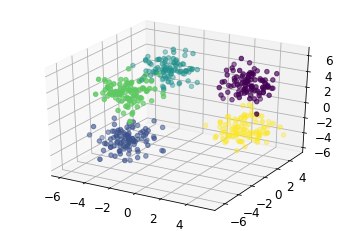

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# the points color depends on their label
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()


<div class="alert alert-block alert-success">

**Question 2.** Complete the following code to apply classification with K-means, first with a single try (a single initialization followed by a single execution of K-means, `n_init = 1`) then using the `k-means ++` initialization method. Before, don't hesitate to examine the parameters, attributes, and methods of the [`sklearn.cluster.KMeans class`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
</div>

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)

#garder que :
#kmeans = KMeans(n_clusters=5,# Complete the code


We can obtain the predicted groups for the data using the `predict(X)` method:


<div class="alert alert-block alert-success">

**Question 3.** Use `predict()` method to store the predicted labels in an element called `pred`. Print it.

</div>

In [46]:
# Write the code here
pred = kmeans.predict(data)
print(pred)


[2 1 2 4 1 2 2 3 4 1 1 1 0 3 0 1 4 1 4 4 3 2 0 1 1 1 0 4 2 3 4 1 0 3 1 2 0
 3 0 0 3 4 0 1 3 2 0 2 4 3 4 2 1 0 0 0 1 4 0 3 2 1 1 1 0 1 4 0 1 0 3 2 4 3
 4 0 3 1 4 4 2 2 3 0 4 4 2 2 2 3 2 2 2 1 3 1 1 3 4 1 2 0 2 4 0 2 1 2 4 2 2
 4 1 3 2 3 1 3 2 2 4 4 0 3 2 0 4 4 3 3 2 0 1 1 1 3 1 0 0 4 0 3 4 4 0 3 4 4
 4 0 4 0 0 3 4 4 3 2 1 3 3 0 4 2 0 2 0 1 1 2 3 1 3 1 2 3 3 0 4 1 1 0 4 3 1
 2 2 3 1 1 0 1 4 1 2 2 0 4 4 2 0 4 1 3 0 2 2 3 2 3 4 2 4 2 4 4 2 3 3 1 1 1
 2 3 3 1 0 1 0 3 4 4 1 1 4 3 4 2 3 4 3 1 0 0 3 0 2 4 2 0 1 0 3 3 2 3 2 4 4
 2 2 4 4 3 4 4 0 0 4 0 2 0 2 4 1 0 4 0 0 4 3 2 0 1 2 2 0 3 0 2 1 4 1 1 0 4
 2 4 2 3 0 2 2 4 0 0 4 4 1 2 3 1 0 4 3 0 1 3 1 0 1 4 3 0 2 2 4 4 3 0 3 2 4
 0 0 4 0 2 0 0 4 4 4 3 1 0 0 3 1 4 1 3 1 1 3 4 2 1 3 3 4 1 4 2 1 3 3 3 4 0
 1 3 4 2 2 2 3 2 0 1 3 1 1 1 1 4 3 2 3 2 1 0 3 2 3 2 1 0 3 4 0 4 2 2 1 2 1
 1 2 3 2 1 1 3 0 3 0 0 0 2 3 1 3 0 3 3 1 1 3 2 0 1 4 2 4 4 1 0 1 0 3 4 4 3
 0 2 3 0 2 2 2 2 1 2 1 3 1 0 1 0 0 0 0 1 3 3 4 4 1 2 3 2 1 3 3 3 0 4 1 0 0
 3 4 0 4 2 0 1 4 2 2 0 4 

The groups associated with the training examples are also stored in the `kmeans.labels_` attribute:

In [47]:
#The cluster assignments of the instances are contained in kmeans.labels_:
print(kmeans.labels_)

[2 1 2 4 1 2 2 3 4 1 1 1 0 3 0 1 4 1 4 4 3 2 0 1 1 1 0 4 2 3 4 1 0 3 1 2 0
 3 0 0 3 4 0 1 3 2 0 2 4 3 4 2 1 0 0 0 1 4 0 3 2 1 1 1 0 1 4 0 1 0 3 2 4 3
 4 0 3 1 4 4 2 2 3 0 4 4 2 2 2 3 2 2 2 1 3 1 1 3 4 1 2 0 2 4 0 2 1 2 4 2 2
 4 1 3 2 3 1 3 2 2 4 4 0 3 2 0 4 4 3 3 2 0 1 1 1 3 1 0 0 4 0 3 4 4 0 3 4 4
 4 0 4 0 0 3 4 4 3 2 1 3 3 0 4 2 0 2 0 1 1 2 3 1 3 1 2 3 3 0 4 1 1 0 4 3 1
 2 2 3 1 1 0 1 4 1 2 2 0 4 4 2 0 4 1 3 0 2 2 3 2 3 4 2 4 2 4 4 2 3 3 1 1 1
 2 3 3 1 0 1 0 3 4 4 1 1 4 3 4 2 3 4 3 1 0 0 3 0 2 4 2 0 1 0 3 3 2 3 2 4 4
 2 2 4 4 3 4 4 0 0 4 0 2 0 2 4 1 0 4 0 0 4 3 2 0 1 2 2 0 3 0 2 1 4 1 1 0 4
 2 4 2 3 0 2 2 4 0 0 4 4 1 2 3 1 0 4 3 0 1 3 1 0 1 4 3 0 2 2 4 4 3 0 3 2 4
 0 0 4 0 2 0 0 4 4 4 3 1 0 0 3 1 4 1 3 1 1 3 4 2 1 3 3 4 1 4 2 1 3 3 3 4 0
 1 3 4 2 2 2 3 2 0 1 3 1 1 1 1 4 3 2 3 2 1 0 3 2 3 2 1 0 3 4 0 4 2 2 1 2 1
 1 2 3 2 1 1 3 0 3 0 0 0 2 3 1 3 0 3 3 1 1 3 2 0 1 4 2 4 4 1 0 1 0 3 4 4 3
 0 2 3 0 2 2 2 2 1 2 1 3 1 0 1 0 0 0 0 1 3 3 4 4 1 2 3 2 1 3 3 3 0 4 1 0 0
 3 4 0 4 2 0 1 4 2 2 0 4 

Notice that it's preferable to use `predict()`method only for new instances (no training data).

<div class="alert alert-block alert-success">
    
**Question 4.** Write the code to display the results of this classification.
</div>


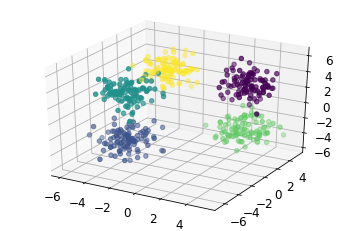

In [49]:
# Write the code here
#Tout effacer
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred)
plt.show()

## Clustering performance evaluation

The results obtained by clustering approachs are all the more significant as two different methods, or two different initializations for the same method sensitive to initialization, produce (approximately) the same groups. To measure the consistency between the results of two different applications of classification algorithms it is possible to use different measures e.g. **adjusted rand index**, **Jaccard index**, **standardized mutual information**. These measures are available (with anothers) in [Scikit-learn and describe in this web documentation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).

Some details about the two first measures:
 1. Adjusted rand index. A classification $\mathcal{C}$ is defined as the set of pairs of observations which are in the same group, among all possible pairs. We denote by $n_{11}$ the number of pairs which are in the same group following $\mathcal{C}$ and $\mathcal{C}'$, by $n_{00}$ the number of pairs which are in different groups following $\mathcal{C}$ and $\mathcal{C}'$, by $n_{10}$ the number of pairs in the same group following $\mathcal{C}$ and different groups following $\mathcal{C}'$, and finally by $n_{01}$ the number of pairs in the same group following $\mathcal{C}'$ and different groups following $\mathcal{C}$. If $\mathcal{C}$, $\mathcal{C}'$ are two different classifications, the Rand index is the probability that the two classifications agree for a randomly chosen pair of data. It can be expressed as the following: 
 $$ \mathcal{R} (\mathcal{C}, \mathcal{C}') = \frac{2(n_{00}+n_{11})}{N(N-1)}, \ \ \ 0<\mathcal{R}<1$$ 
 The **Adjusted Rand index (ARI)** is defined as:
 $$ \mathcal{R}_{adj} (\mathcal{C}, \mathcal{C}') = \frac{\mathcal{R} - \mathbb{E}(\mathcal{R})}{max(\mathcal{R}) - \mathbb{E}(\mathcal{R})}$$ 
 where, $\mathbb{E}(\mathcal{R})$ is the expectation of the Rand index and $max(\mathcal{R})$ is the maximum value it can reach.
 2. Jaccard index. It is defined as:
 $$ \mathcal{J} (\mathcal{C}, \mathcal{C}') = \frac{n_{11}}{n_{11} + n_{10} + n_{01}}$$ 
 

Therefore, it is possible to assess the consistency between the starting groups and the partitioning found by K-means using the [Adjusted Rand index](https://fr.wikipedia.org/wiki/Indice_de_Rand). You can use `metrics.adjusted_rand_score()` that compares the partitioning obtained by the applying the clustering approach (`pred` group labels) with the partitioning corresponding to the groups defined at the start (labels stored in `labels`).



<div class="alert alert-block alert-success">
    
**Question 5.** Print in the following cell the adjusted rand index score between the true labels and the predictied labels. Comment it. 

</div>

In [50]:
from sklearn import metrics

# Write the code here
metrics.adjusted_rand_score(pred, labels)

0.9949848742198414

<div class="alert alert-block alert-success">

**Solution.** The value is close to one which means that we obtain a very good labeling. Perfect labeling is scored 1 and bad (e.g. independent labelings) have negative or close to 0 scores. 
</div>

<div class="alert alert-block alert-success">
    
**Question 5.** Now apply the K-means approach with a single trial (n_init = 1) **using the random initialization method**. Then, print the adjusted rand index score.

</div>


In [54]:
# Write the code here
#Tout effacer
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

0.7162890674521413

<div class="alert alert-block alert-success">
    
**Question 6.** Repeat the classification several times with each of these two initialization methods and each time examine the consistency of the resulting groups with the starting groups. What do you observe? Explain.

</div>

In [62]:
# Complete the following code:
ARI_kmeans =[]
ARI_random =[]

for i in range(10):
    #EFFACER
    kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)
    ARI_kmeans.append(metrics.adjusted_rand_score(kmeans.labels_, labels))

    kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
    ARI_random.append(metrics.adjusted_rand_score(kmeans.labels_, labels))
#FIN EFFACER    
#print('ARI with k-means++ initialization: ', ARI_kmeans)
#print('ARI with random initialization: ', ARI_random)

print('ARI mean with k-means++ initialization: ', np.mean(ARI_kmeans))
print('ARI std with k-means++ initialization: ', np.std(ARI_kmeans))
print('ARI mean with random initialization: ', np.mean(ARI_random))
print('ARI std with random initialization: ', np.std(ARI_random))

ARI mean with k-means++ initialization:  0.9949848742198414
ARI std with k-means++ initialization:  0.0
ARI mean with random initialization:  0.8252134627639333
ARI std with random initialization:  0.13863842728921308


<div class="alert alert-block alert-success">

**Solution.** We observe that the ARI score for the k-means++ initialization remains empirically stable and is close to 1. However the ARI score for the random initialization fluctuates and is sometimes degraded. Therefore, for a different initialization we can obtain different clustering. We notice that the k-means++ initialization remains stable and good which means that this approach is smart and better than a random initialization. 
</div>

<div class="alert alert-block alert-success">
    
**Question 7.** Vary the number of groups (`n_clusters`) and experiment several times for each value of the number of groups. Examine the stability of the results again using the Adjusted Rand's Index (ARI). Explain what you notice.

</div>



ARI with k-means++ initialization:  [0.3668131132979548, 0.6020946741298885, 0.7689849367879481, 0.9949848742198414, 0.929402874323357, 0.8552673301323588, 0.7841225568088501, 0.7633536814389614]
ARI with random initialization:  [0.3668131132979548, 0.6040966462444258, 0.7787815392849256, 0.7127400962867465, 0.9254920783996599, 0.6631920128801687, 0.8983482311668363, 0.7530121401953761]


Text(0.5, 1.0, 'ARI for random initialization')

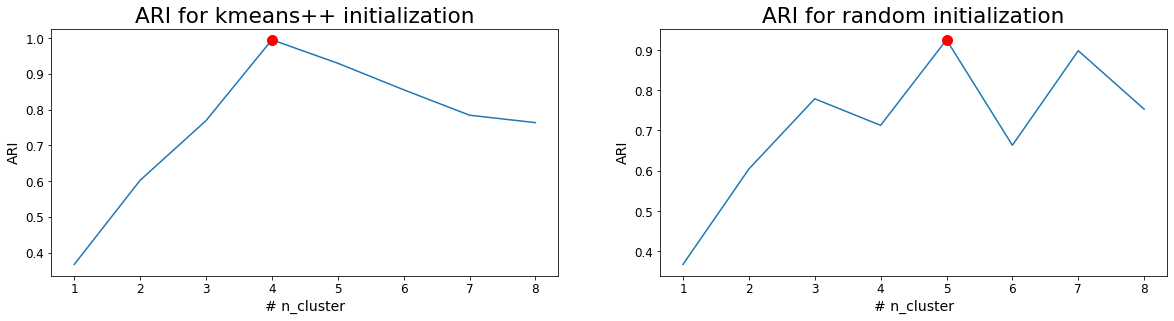

In [97]:
# Complete the following code:
ARI_kmeans =[]
ARI_random =[]

i=2

while i < 10:
    #EFFACER
    kmeans = KMeans(n_clusters= i , n_init=1, init='k-means++').fit(data)
    ARI_kmeans.append(metrics.adjusted_rand_score(kmeans.labels_, labels))

    kmeans = KMeans(n_clusters= i , n_init=1, init='random').fit(data)
    ARI_random.append(metrics.adjusted_rand_score(kmeans.labels_, labels))
    i+=1
    
 
print('ARI with k-means++ initialization: ', ARI_kmeans)
print('ARI with random initialization: ', ARI_random)

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(221)

# The argmax() function can be used to identify the location of the maximum point of a vector.
plt.plot(np.arange(len(ARI_kmeans))+2, ARI_kmeans)
plt.plot(np.argmax(ARI_kmeans)+2, np.max(ARI_kmeans), "or")
plt.xlabel('# n_cluster')
plt.ylabel('ARI')
plt.title('ARI for kmeans++ initialization')

plt.subplot(222)
# The argmax() function can be used to identify the location of the maximum point of a vector.
plt.plot(np.arange(len(ARI_random))+2, ARI_random)
plt.plot(np.argmax(ARI_random)+2, np.max(ARI_random), "or")
plt.xlabel('# n_cluster')
plt.ylabel('ARI')
plt.title('ARI for random initialization')


#FIN EFFACER   

<div class="alert alert-block alert-success">

**Solution.** If we run several time the previous cell, we notice that the results for kmeans++ initialization are more stable than for random. The fluctuations due to random initialization can make more difficult to identify the number of clusters. The initialization of the centers is a big deal step. 
</div>


<div class="alert alert-block alert-success">
    
**Question 8.** Vary the number of groups (`n_clusters`) between 2 and 20, draw the graph of the evolution of the final value reached by the cost (inertia, see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) for each of the values of `n_clusters`. Comment it. 

Note that `.inertia_` is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering.

</div>

[8048.19356026033, 4925.388055852114, 3210.9938569065416, 1481.8853299916714, 1401.7728562715183, 1324.7705442858633, 1252.4049862847519, 1188.8480917840407, 1152.1556945297857, 1101.9235398604096, 1052.1028674023216, 1054.677965369889, 955.892184287868, 1005.3272193461863, 917.7814928971628, 845.8891209287596, 864.8150642789515, 775.2126194100153, 839.4525481466184]
[8106.925852611657, 4925.388055852114, 3387.1613679530897, 1481.8853299916714, 1397.7481893625031, 1336.7141816973267, 1250.2241911992887, 1199.2293339827124, 1112.906756916384, 1058.414011233423, 1000.4328328026967, 979.6486844024525, 932.6534600850523, 924.7808205168533, 901.0654001468379, 810.9188252358318, 778.7755876038226, 752.3144427950322, 731.8345786541939]


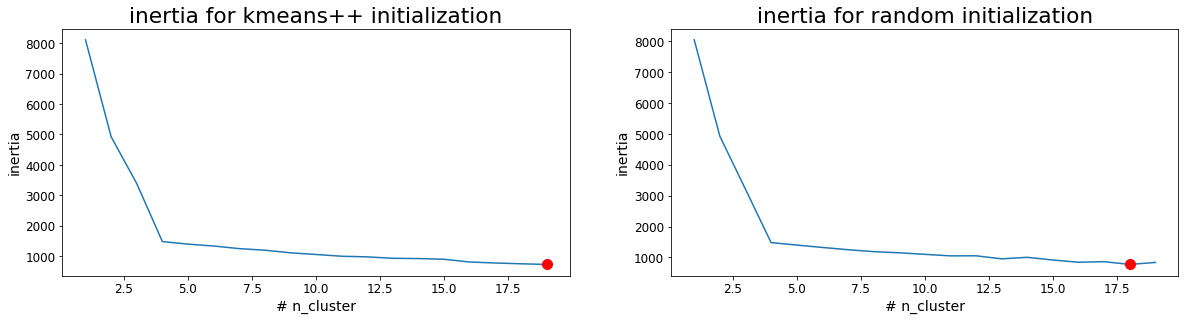

In [103]:
# Complete the following code:

inertia_kmeans = []
inertia_random = []

i=2

while i < 21:
    #EFFACER
    kmeans = KMeans(n_clusters= i , n_init=1, init='k-means++').fit(data)
    inertia_kmeans.append(kmeans.inertia_)

    kmeans = KMeans(n_clusters= i , n_init=1, init='random').fit(data)
    inertia_random.append(kmeans.inertia_)
    i+=1

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(221)

# The argmax() function can be used to identify the location of the maximum point of a vector.
plt.plot(np.arange(len(inertia_kmeans))+2, inertia_kmeans)
plt.plot(np.argmin(inertia_kmeans)+2, np.min(inertia_kmeans), "or")
plt.xlabel('# n_cluster')
plt.ylabel('inertia')
plt.title('inertia for kmeans++ initialization')

plt.subplot(222)
# The argmax() function can be used to identify the location of the maximum point of a vector.
plt.plot(np.arange(len(inertia_random))+2, inertia_random)
plt.plot(np.argmin(inertia_random)+2, np.min(inertia_random), "or")
plt.xlabel('# n_cluster')
plt.ylabel('inertia')
plt.title('inertia for random initialization')

print(inertia_random)
print(inertia_kmeans)

<div class="alert alert-block alert-success">

**Solution.** The larger the number of clusters, the smaller the inertia. However we observe a huge drop towards a number of 4 clusters. Which is close to the true value of 5 clusters. Probably two of our simulated clusters are close and difficult to distinguish here for kmeans. We can see the importance of repeating the kmeans algorithm several times and not concluding after a single run of the approach.
</div>

To run the `Kmeans()` function in python with multiple initial cluster assignments, we use the `n_init` argument (the default value is 10). If a value of `n_init` greater than one is used, then K-means clustering will be performed using multiple random assignments, and the `Kmeans()` function will report only the best results.

In [104]:
kmeans_single_run = KMeans(n_clusters = 5, n_init = 1, random_state = 123).fit(data)
kmeans_single_run.inertia_

1481.8853299916714


<div class="alert alert-block alert-success">
    
**Question 9.** For `n_clusters= 5`, vary the number of initial cluster assignments (`n_init`) between 2 and 20, draw the graph of the evolution of the final value reached by the cost (inertia) for each of the values of `n_init`. Do it for `n_clusters= 4` and `n_clusters= 6`. Comment it. 


</div>

Text(0.5, 1.0, 'inertia for 6 clusters')

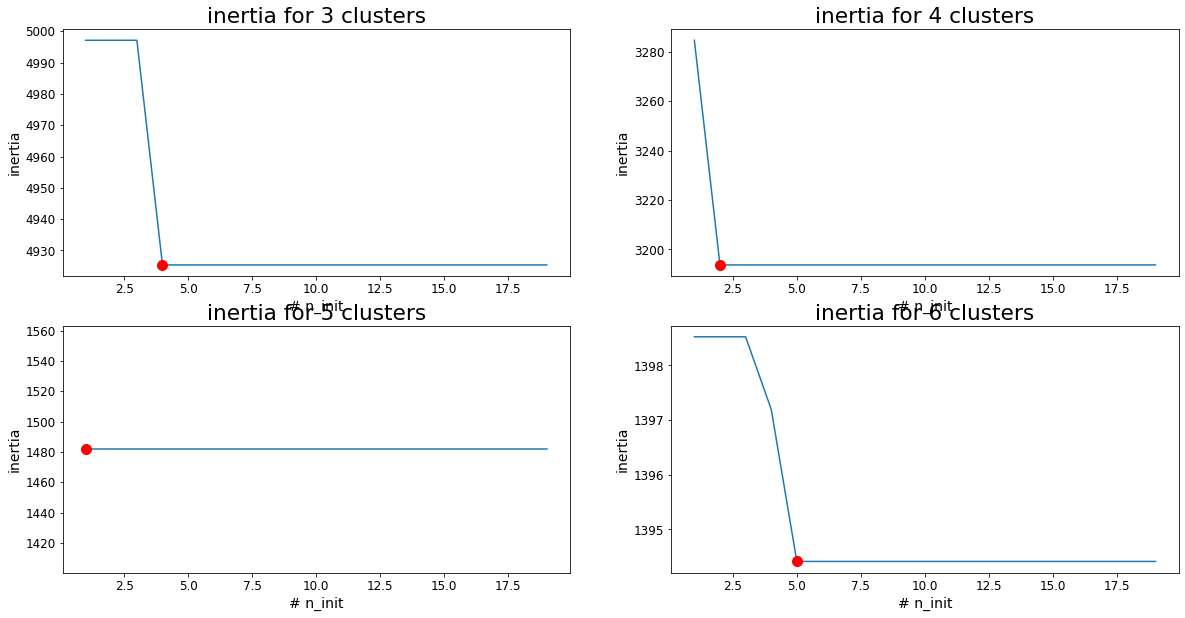

In [113]:
# Complete the following code:

inertia_5 = []
inertia_3 = []
inertia_4 = []
inertia_6 = []

i=2

while i < 21:
    #EFFACER
    kmeans = KMeans(n_clusters= 5 , n_init=i, random_state = 123).fit(data)
    inertia_5.append(kmeans.inertia_)
    kmeans = KMeans(n_clusters= 4 , n_init=i, random_state = 123).fit(data)
    inertia_4.append(kmeans.inertia_)
    kmeans = KMeans(n_clusters= 3 , n_init=i, random_state = 123).fit(data)
    inertia_3.append(kmeans.inertia_)
    kmeans = KMeans(n_clusters= 6 , n_init=i, random_state = 123).fit(data)
    inertia_6.append(kmeans.inertia_)

    i+=1

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(2, 2, 1)

# The argmax() function can be used to identify the location of the maximum point of a vector.
plt.plot(np.arange(len(inertia_3))+2, inertia_3)
plt.plot(np.argmin(inertia_3)+2, np.min(inertia_3), "or")
plt.xlabel('# n_init')
plt.ylabel('inertia')
plt.title('inertia for 3 clusters')


plt.subplot(2, 2, 2)
# The argmax() function can be used to identify the location of the maximum point of a vector.
plt.plot(np.arange(len(inertia_4))+2, inertia_4)
plt.plot(np.argmin(inertia_4)+2, np.min(inertia_4), "or")
plt.xlabel('# n_init')
plt.ylabel('inertia')
plt.title('inertia for 4 clusters')

plt.subplot(2, 2, 3)
# The argmax() function can be used to identify the location of the maximum point of a vector.
plt.plot(np.arange(len(inertia_5))+2, inertia_5)
plt.plot(np.argmin(inertia_5)+2, np.min(inertia_5), "or")
plt.xlabel('# n_init')
plt.ylabel('inertia')
plt.title('inertia for 5 clusters')


plt.subplot(2, 2, 4)
# The argmax() function can be used to identify the location of the maximum point of a vector.
plt.plot(np.arange(len(inertia_6))+2, inertia_6)
plt.plot(np.argmin(inertia_6)+2, np.min(inertia_6), "or")
plt.xlabel('# n_init')
plt.ylabel('inertia')
plt.title('inertia for 6 clusters')


<div class="alert alert-block alert-success">

**Solution.** It is generally recommended to always run K-means clustering with a large value of `n_init`, such as 20 to avoid getting stuck in an undesirable local optimum. We observe that for `n_cluster=5` we catch the global optimum since the first initialization. This is mainly due to the default: `init='k-means++'` argument.  


</div>

When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the random_state parameter. This way, the initial cluster assignments can be replicated, and the K-means output will be fully reproducible.

# Hierarchical Clustering

The `linkage()` function from `scipy` implements several clustering functions in python. In the following example we use the data from the previous section to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure. We begin by clustering observations using complete linkage:



In [114]:
from scipy.cluster.hierarchy import linkage

hc_complete = linkage(data, "complete")


<div class="alert alert-block alert-success">
    
**Question 10.** By taking inspiration from the previous code, perform hierarchical clustering with average or single linkage.

</div>

In [115]:
# Write the code here
# tout effacer 
hc_average = linkage(data, "average")
hc_single = linkage(data, "single")


We can now plot the dendrograms obtained using the usual `dendrogram()` function. The numbers at the bottom of the plot identify each observation:

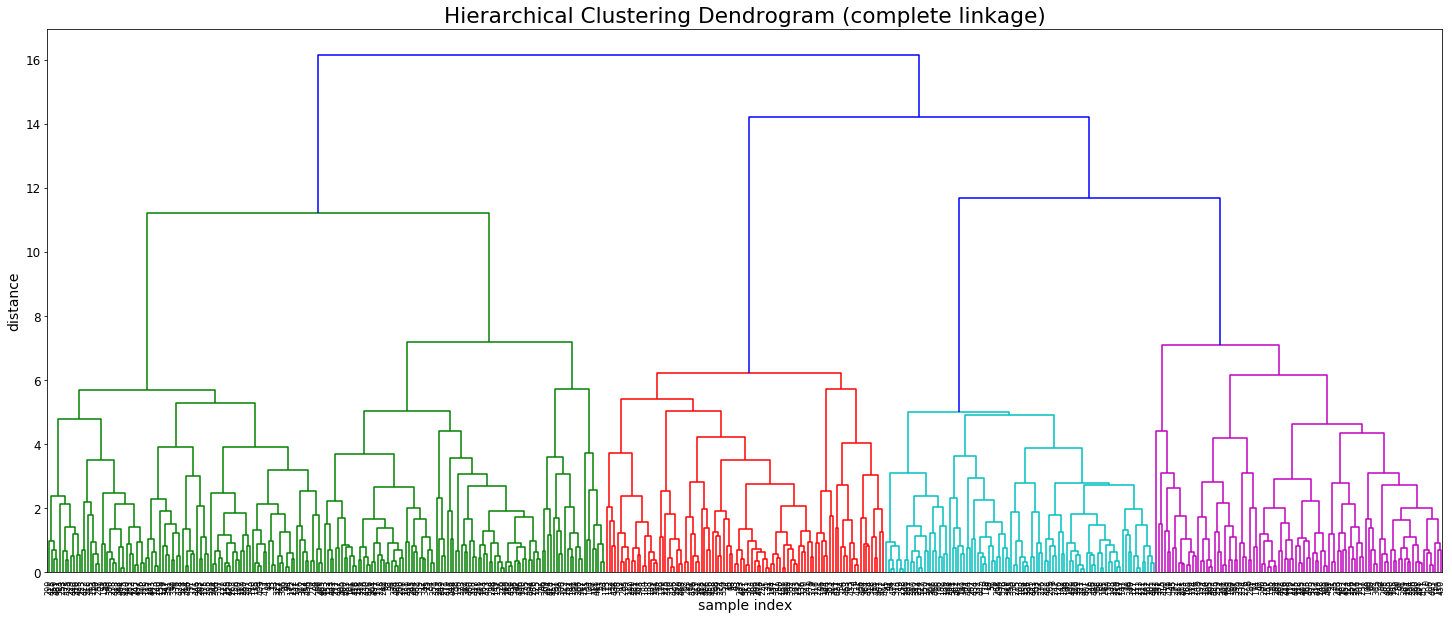

In [123]:
from scipy.cluster.hierarchy import dendrogram

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (complete linkage)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

<div class="alert alert-block alert-success">
    
**Question 11.** By taking inspiration from the previous code, plot the dendrograms using average and then single linkage clustering.

</div>

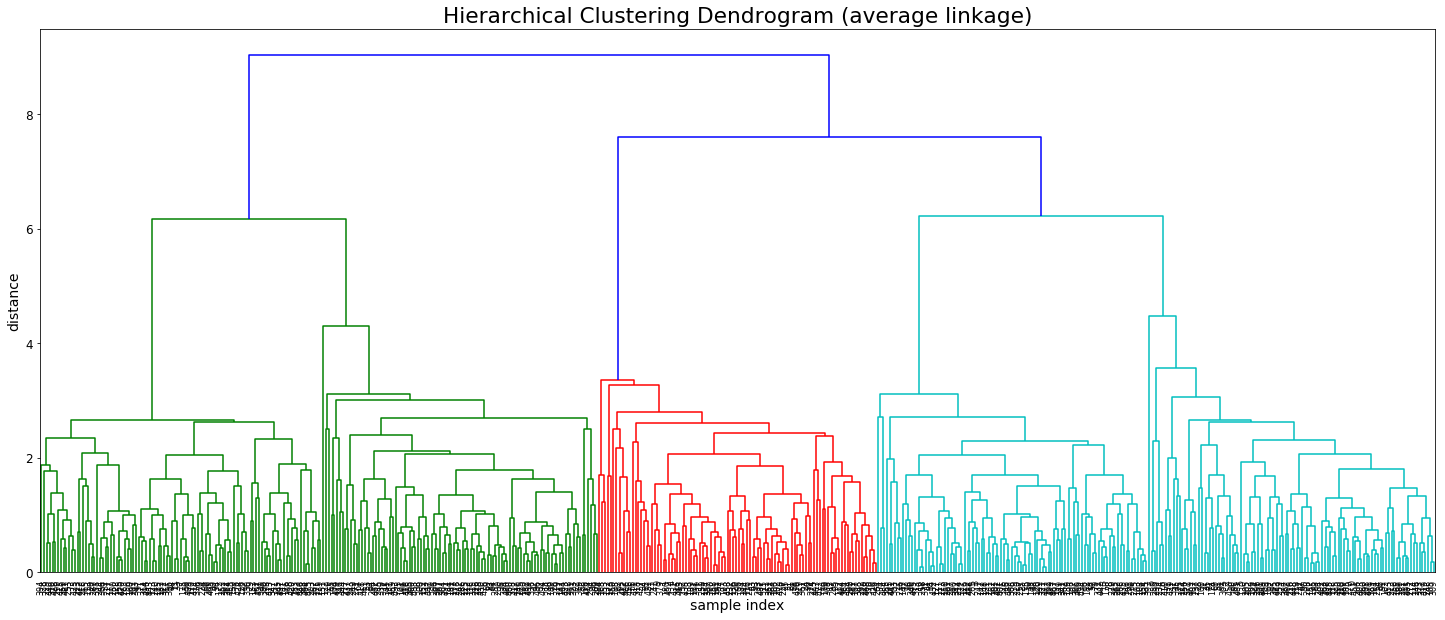

In [117]:
#SOLUTION
# calculate full dendrogram using average linkage clustering
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (average linkage)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_average,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

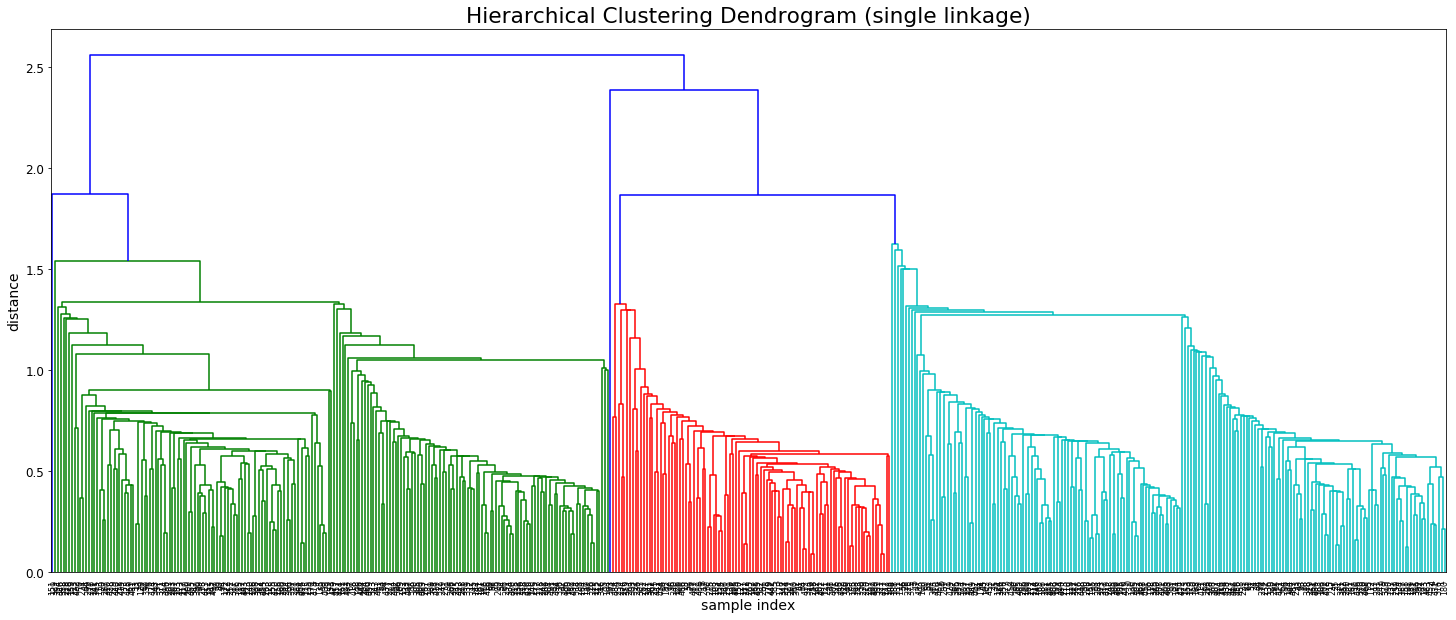

In [118]:
#SOLUTION
# calculate full dendrogram using single linkage clustering
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (single linkage)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the `cut_tree()` function:


In [122]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters = 5).T) # Printing transpose just for space

[[0 1 0 2 1 0 0 3 2 1 1 1 4 3 4 1 2 1 2 2 3 0 4 1 1 1 4 2 0 3 2 1 4 3 1 0
  4 3 4 4 3 2 4 1 3 0 4 0 2 3 2 0 1 4 4 4 1 2 4 3 0 1 1 1 4 1 2 4 1 4 3 0
  2 3 2 4 3 1 2 2 0 0 3 4 2 2 0 0 0 3 0 0 0 1 3 1 1 3 2 1 0 4 0 2 4 0 1 0
  2 0 0 2 1 3 0 3 1 3 0 0 2 2 4 3 0 4 2 2 3 3 0 4 1 1 1 3 1 4 4 2 4 3 2 2
  4 3 2 2 2 4 2 4 4 3 2 2 3 0 1 3 3 4 2 0 4 0 4 1 1 0 3 1 3 1 0 3 3 4 2 1
  1 4 2 3 1 0 0 3 1 1 4 1 2 1 0 0 4 2 2 0 4 2 1 3 4 0 0 3 0 3 2 0 2 0 2 2
  0 3 3 1 1 1 0 3 3 1 4 1 4 3 0 2 1 1 0 3 2 0 3 2 3 1 4 4 3 4 0 2 0 4 1 4
  3 3 0 3 0 2 2 0 0 2 2 3 2 2 4 4 2 4 0 4 0 2 1 4 0 4 4 2 3 0 4 1 0 0 4 3
  4 0 1 2 1 1 4 2 0 2 0 3 4 0 0 2 4 4 2 2 1 0 3 1 4 2 3 4 1 3 1 4 1 2 3 4
  0 0 2 2 3 4 3 0 2 4 4 2 4 0 4 4 2 2 2 3 1 4 4 3 1 2 1 3 1 1 3 2 0 1 3 3
  2 1 2 0 1 3 3 3 2 4 1 3 2 0 0 0 3 0 4 1 3 1 1 1 1 2 3 0 3 0 1 4 3 0 3 0
  1 4 3 2 4 2 0 0 1 0 1 1 0 3 0 1 1 3 4 3 4 4 4 0 3 1 3 4 3 3 1 1 3 0 4 1
  2 0 2 2 1 4 1 4 3 2 2 3 4 0 3 4 0 0 0 0 1 0 1 3 1 4 1 4 4 4 4 1 3 3 2 2
  1 0 3 0 1 3 3 3 4 2 1 4 4 3 2 4 2 0 

<div class="alert alert-block alert-success">
    
**Question 12.** For this generated data set compare the clustering obtainend by each linkage clustering.
</div>

In [148]:
# SOLUTION
hc_complete_labels = cut_tree(hc_complete, n_clusters = 5)
hc_average_labels = cut_tree(hc_average, n_clusters = 5)
hc_single_labels = cut_tree(hc_single, n_clusters = 5)

#convert the shape of hc_complete_labels as the same than labels
hc_complete_labels.shape = (500,)
hc_average_labels.shape = (500,)
hc_single_labels.shape = (500,)

print('ARI between hc_complete_labels and true labels: ',metrics.adjusted_rand_score(hc_complete_labels, labels))
print('ARI between hc_average_labels and true labels: ',metrics.adjusted_rand_score(hc_average_labels, labels))
print('ARI between hc_single_labels and true labels: ',metrics.adjusted_rand_score(hc_single_labels, labels))

ARI between hc_complete_labels and true labels:  0.9800934302411604
ARI between hc_average_labels and true labels:  0.9800934302411604
ARI between hc_single_labels and true labels:  0.6117150363253954


<div class="alert alert-block alert-success">

**Solution.** For this data, complete and average linkage generally separates the observations into their correct groups.

</div>

# NCI60 Data Example

Unsupervised techniques are often used in the analysis of genomic data. In this portion of the lab, we'll see how hierarchical and K-means clustering compare on the NCI60 cancer cell line microarray data, which consists of 6,830 gene expression measurements (i.e. 6,830 features) on 64 cancer cell lines (i.e. 64 instances).

<div class="alert alert-block alert-success">
    
**Question 13.** As did in the previous practical sessions, load the data sets NCI60 from this link: https://raw.githubusercontent.com/myriamtami/ML-Labs/master/Data/NCI160/. There are two .csv files: one is associated to the data (NCI60_data.csv) and the other to the labels (NCI60_labs.csv). 
</div>

In [3]:

# Load NCI60 data Colab version:

import os
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/myriamtami/ML-Labs/master/Data/NCI160/"
DATA_PATH = "data"
DATA_URL = DOWNLOAD_ROOT + "NCI60_data.csv"

def fetch_nci_data_data(nci_data_url=DATA_URL, nci_data_path=DATA_PATH):
    if not os.path.isdir(nci_data_path):
        os.makedirs(nci_data_path)
    path = os.path.join(nci_data_path, "NCI60_data.csv")
    urllib.request.urlretrieve(nci_data_url, path)

fetch_nci_data_data()

# Load data
nci_data = pd.read_csv('./data/NCI60_data.csv', index_col = False)
nci_data.head()
    


,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [4]:

# Load NCI60 data labels Colab version:

import os
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/myriamtami/ML-Labs/master/Data/NCI160/"
DATA_PATH = "data"
DATA_URL = DOWNLOAD_ROOT + "NCI60_labs.csv"

def fetch_nci_labs_data(nci_labs_url=DATA_URL, nci_labs_path=DATA_PATH):
    if not os.path.isdir(nci_labs_path):
        os.makedirs(nci_labs_path)
    path = os.path.join(nci_labs_path, "NCI60_labs.csv")
    urllib.request.urlretrieve(nci_labs_url, path)

fetch_nci_labs_data()


# Load data
nci_labs = pd.read_csv('./data/NCI60_labs.csv', index_col = False)
nci_labs.head()


,x
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST


In [5]:
#You can print some informations about the data sets:

#print(np.shape(nci_labs))
#print(np.shape(nci_data))
#nci_labs.describe()
#nci_data.describe()
#nci_labs.info()

        x
0     CNS
1     CNS
2     CNS
3   RENAL
4  BREAST
          1         2         3         4         5             6         7  \
0  0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02  0.350000   
1  0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01  0.699961   
2  0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00  0.090000   
3  0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17  0.170000   
4  0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03  0.085000   

          8         9        10  ...      6821      6822      6823      6824  \
0 -0.315000 -0.450000 -0.654981  ... -0.990019  0.000000  0.030000 -0.175000   
1  0.724961 -0.040039 -0.285020  ... -0.270058 -0.300039 -0.250039 -0.535039   
2  0.645000  0.430000  0.475019  ...  0.319981  0.120000 -0.740000 -0.595000   
3  0.245000  0.020000  0.095019  ... -1.240020 -0.110000 -0.160000  0.095000   
4  0.110000  0.235000  1.490019  ...  0.554980 -0.775000 -0.51500

Each cell line is labeled with a cancer type. We'll ignore the cancer types in performing clustering, as these are unsupervised techniques. After performing clustering, we'll use this column to see the extent to which these cancer types agree with the results of these unsupervised techniques.

<div class="alert alert-block alert-success">
    
**Question 14.** Check that the data has 64 rows and 6,830 columns.
</div>

In [162]:
# Write the code here
#Tout effacer
nci_data.shape

(64, 6830)

<div class="alert alert-block alert-success">
    
**Question 15.** Take a look at the cancer types for the cell lines. Count the number of instances associated to each type of cancer.
</div>



In [163]:
# Write the code here
#Tout effacer
nci_labs.x.value_counts(sort=True)

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
MCF7D-repro    1
K562A-repro    1
UNKNOWN        1
MCF7A-repro    1
K562B-repro    1
Name: x, dtype: int64

## Clustering on real data (NCI60 data)

We now proceed to hierarchically cluster the cell lines in the NCI60 data, with the goal of finding out whether or not the observations cluster into distinct types of cancer.


<div class="alert alert-block alert-success">
    
**Question 16.** Perform hierarchical clustering of the instances using complete, single, and average linkage. We'll use standard Euclidean distance as the dissimilarity measure. Comment the results.
</div>

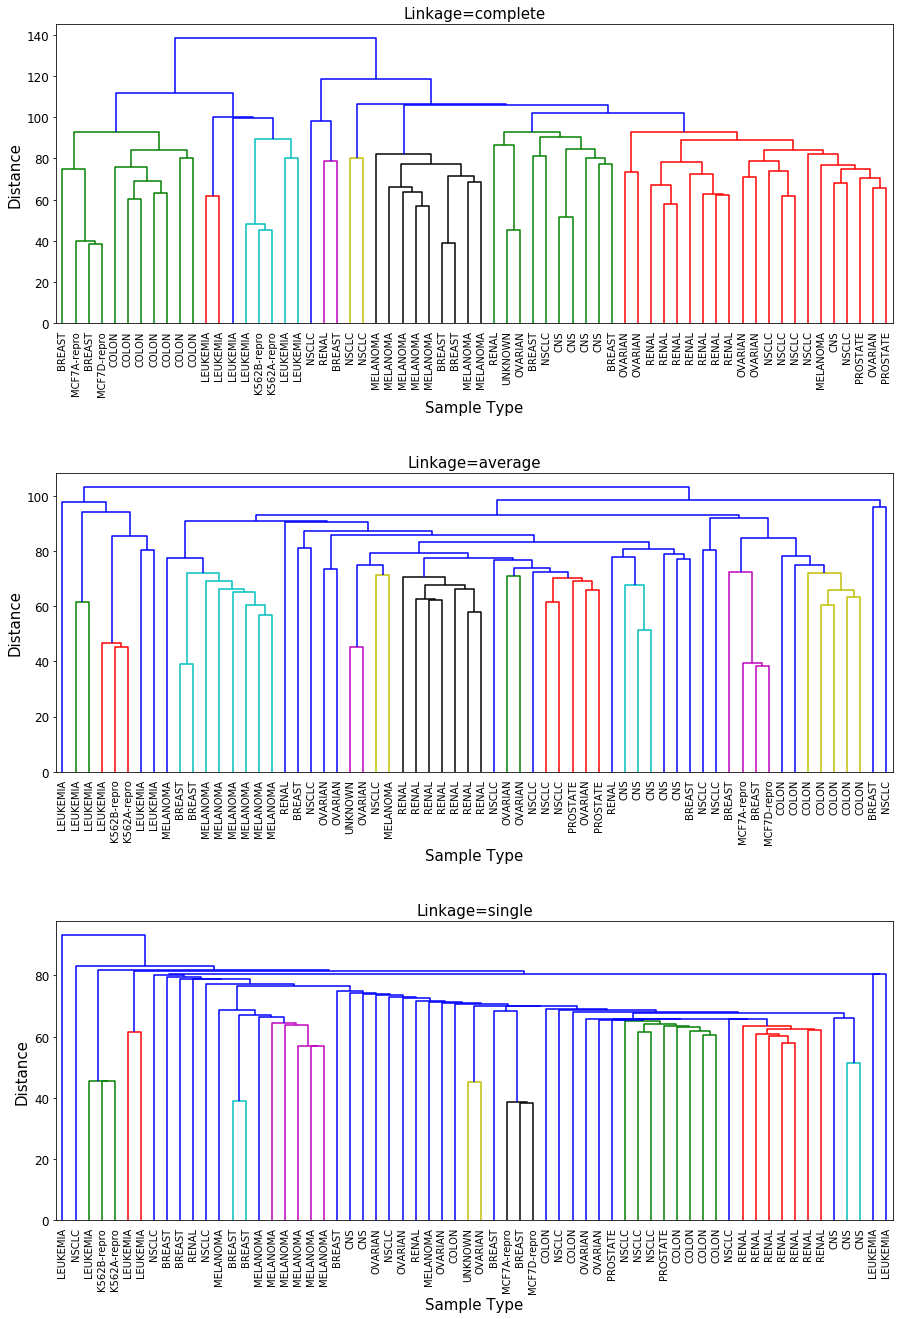

In [161]:
#Write the code here

nci_data.index = nci_labs.x

fig, ax = plt.subplots(3,1, figsize=(15,22))
fig.subplots_adjust(hspace=0.5)

linkages = ['complete', 'average', 'single']
for link, axis in zip(linkages, fig.axes):
    hc = linkage(y = nci_data, method=link, metric='euclidean') 
    axis.set_title("Linkage=%s" % link, size=15)
    axis.set_xlabel('Sample Type', size=15)
    axis.set_ylabel('Distance', size=15)
    dendrogram(hc, ax=axis, labels=nci_data.index, leaf_rotation=90, leaf_font_size=10)

<div class="alert alert-block alert-success">

**Solution.** We see that the choice of linkage affects the results obtained. Typically, single linkage will tend to yield trailing clusters: very large clusters onto which individual observations attach one-by-one. On the other hand, complete and average linkage tend to yield more balanced and then attractive clusters. For this reason, complete and average linkage are generally preferred to single linkage. Clearly cell lines within a same cancer type do tend to cluster together, although the clustering is not perfect.

</div>

Let's **use our complete linkage hierarchical clustering for the analysis**.

<div class="alert alert-block alert-success">
    
**Question 17.** Cut the dendrogram at the height that will yield a particular number of clusters. You can start by the number of $4$. 
</div>

In [164]:
# Complete the code
#nci_hc_complete = #To complete
#nci_hc_complete_4_clusters = #To complete

#effacer
nci_hc_complete = linkage(y = nci_data, method="complete", metric='euclidean') 
#effacer
nci_hc_complete_4_clusters = cut_tree(nci_hc_complete, n_clusters = 4) 

#pas effacer
pd.crosstab(index = nci_data.index, 
            columns = nci_hc_complete_4_clusters.T[0], # Printing transpose just for space
            rownames = ['Cancer Type'], 
            colnames = ['Cluster'])

Cluster,0,1,2,3
Cancer Type,,,,
BREAST,4,1,0,2
CNS,5,0,0,0
COLON,0,0,0,7
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


<div class="alert alert-block alert-success">
    
**Question 18.** Comment the previous table. Do you notice some paterns?
</div>

<div class="alert alert-block alert-success">

**Solution.** There are some clear patterns. All the leukemia cell lines fall in cluster 2, while the breast cancer cell lines are spread out over three different clusters. 

</div>

<div class="alert alert-block alert-success">
    
**Question 19.** Plot the cut on the dendrogram that produces these four clusters by adding an `axhline()`, which draws a horizontal line on top of the dendrogram plot.
</div>

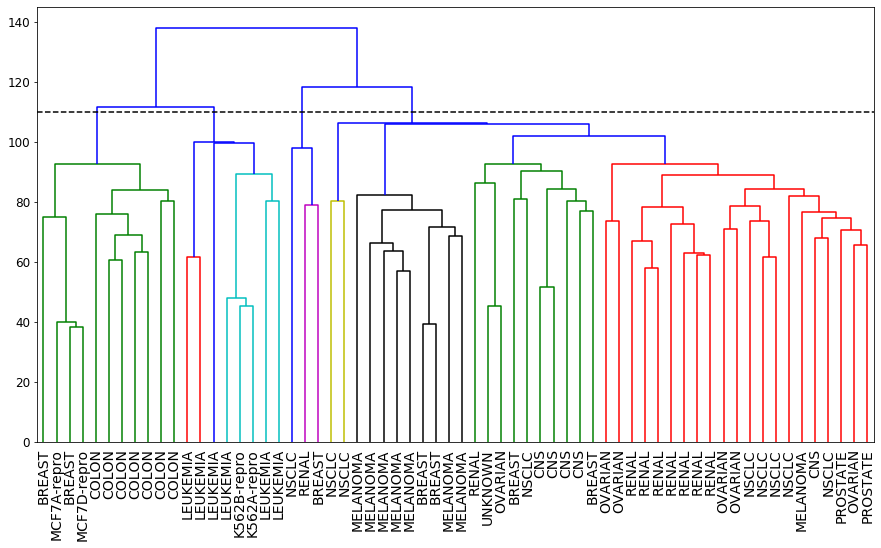

In [165]:
# SOLUTION
fig, ax = plt.subplots(1,1, figsize = (15,8))
dendrogram(nci_hc_complete, 
           labels = nci_data.index, 
           leaf_font_size = 14, 
           show_leaf_counts = True)  

plt.axhline(y=110, c='k', ls='dashed')
plt.show()


<div class="alert alert-block alert-success">

**Question 20.** We claimed earlier that K-means clustering and hierarchical clustering with the dendrogram cut to obtain the same number of clusters can yield very different results. How do these NCI60 hierarchical clustering results compare to what we get if we perform K-means clustering with K = 4?
</div>

In [166]:
# Write the code here
kmean_4 = KMeans(n_clusters = 4, random_state = 123, n_init = 150)    
kmean_4.fit(nci_data)
kmean_4.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

<div class="alert alert-block alert-success">

**Solution.** Then we can use a [confusion matrix](https://fr.wikipedia.org/wiki/Matrice_de_confusion) to compare the differences in how the two methods assigned observations to clusters:

</div>

In [167]:
pd.crosstab(index = kmean_4.labels_, 
            columns = nci_hc_complete_4_clusters.T[0], 
            rownames = ['K-Means'], 
            colnames = ['Hierarchical'])

Hierarchical,0,1,2,3
K-Means,,,,
0,8,0,0,11
1,0,0,8,0
2,25,3,0,0
3,9,0,0,0


<div class="alert alert-block alert-success">

**Solution (next part).** We see that the four clusters obtained using hierarchical clustering and Kmeans clustering are somewhat different. Cluster 0 in K-means clustering is almost identical to cluster 3 in hierarchical clustering. However, the other clusters differ: for instance, cluster 2 in K-means clustering contains a portion of the observations assigned to cluster 0 by hierarchical clustering, as well as all of the observations assigned to cluster 1 by hierarchical clustering.
</div>

In [180]:
# SOLUTION (complement)

nci_hc_complete_4_clusters = cut_tree(nci_hc_complete, n_clusters = 4) 

#print(np.shape(nci_hc_complete_4_clusters))
#print(np.shape(kmean_4.labels_))

#convert the shape of nci_hc_complete_4_clusters as the same than kmean_4.labels_
nci_hc_complete_4_clusters.shape = (64,)



print('ARI between hc_complete_4_clusters and kmeans labels for 4 clusters: ', metrics.adjusted_rand_score(nci_hc_complete_4_clusters, kmean_4.labels_))



ARI between hc_complete_4_clusters and kmeans labels for 4 clusters:  0.3293338803934397


<div class="alert alert-block alert-success">

**Solution (last part).** We see that ARI score agree with the fact that kmeans clustering with K=4 and the four hierarchical clustering are different. It's score is far of 1. 
</div>